In [1]:
from dem_stitcher.rio_tools import reproject_arr_to_match_profile
import numpy as np
from rasterio import default_gtiff_profile
from affine import Affine
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import warnings
import rasterio
from skimage.transform import warp
from verification.labels import resample_labels_into_percentage

In [2]:
def get_test_data_at_origin(M: int, N: int) -> tuple:
    prof = default_gtiff_profile.copy()

    X = np.zeros((M, N), dtype='float32')
    trans = Affine(.25, 0, 1, 0, -.25, 1)

    prof['transform'] = trans
    prof['dtype'] = 'float32'
    prof['crs'] = CRS.from_epsg(4326)
    prof['height'], prof['width'] = X.shape
    prof['count'] = 1
    prof['nodata'] = np.nan
    return X, prof

In [3]:
def downsample_profile(profile_src: dict, factor: int) -> dict:
    D = factor
    prof_dst = profile_src.copy()
    prof_dst['width'] = int(np.ceil(profile_src['width'] / D))
    prof_dst['height'] = int(np.ceil(profile_src['width'] / D))
    trans = profile_src['transform']
    trans_dst = Affine(trans.a * D, 0, trans.c, 0, trans.e * D, trans.f)
    prof_dst['transform'] = trans_dst
    return prof_dst

In [4]:
X, p = get_test_data_at_origin(4, 4)
p

{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': nan, 'dtype': 'float32', 'transform': Affine(0.25, 0.0, 1.0,
       0.0, -0.25, 1.0), 'crs': CRS.from_epsg(4326), 'height': 4, 'width': 4, 'count': 1}

In [5]:
p_dst = downsample_profile(p, 4)
p_dst

{'driver': 'GTiff', 'interleave': 'band', 'tiled': True, 'blockxsize': 256, 'blockysize': 256, 'compress': 'lzw', 'nodata': nan, 'dtype': 'float32', 'transform': Affine(1.0, 0.0, 1.0,
       0.0, -1.0, 1.0), 'crs': CRS.from_epsg(4326), 'height': 1, 'width': 1, 'count': 1}

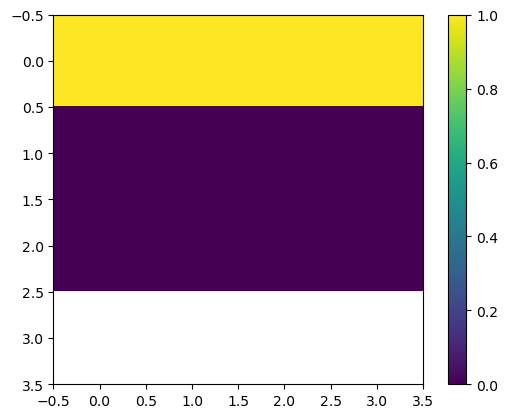

In [6]:
X1 = X + 0.
X1[:1, :] = 1
X1[-1:, :] = np.nan
plt.imshow(X1)
plt.colorbar()

In [7]:
X_percent, p_perc = resample_labels_into_percentage(X1, p, p_dst, 1)
X_percent

array([[0.33333334]], dtype=float32)

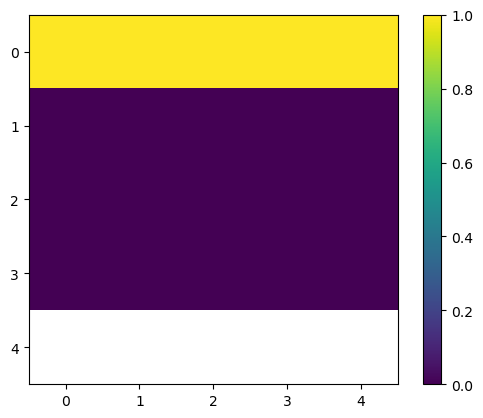

In [8]:
X, p = get_test_data_at_origin(5, 5)
p_dst = downsample_profile(p, 4)
X1 = X + 0.
X1[:1, :] = 1
X1[-1:, :] = np.nan
plt.imshow(X1)
plt.colorbar()

In [9]:
X_percent, p_perc = resample_labels_into_percentage(X1, p, p_dst, 1,)
X_percent

array([[0.25, 0.25],
       [ nan,  nan]], dtype=float32)

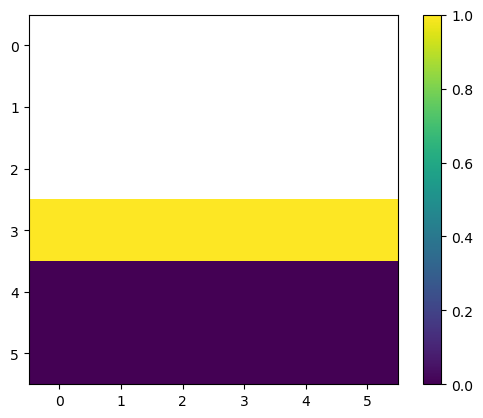

In [10]:
X, p = get_test_data_at_origin(6, 6)
p_dst = downsample_profile(p, 2)
X1 = X + 0.
X1[:3, :] = np.nan
X1[3:4, :] = 1
plt.imshow(X1)
plt.colorbar()

In [11]:
X_percent, p_perc = resample_labels_into_percentage(X1, p, p_dst, 1)
X_percent

array([[nan, nan, nan],
       [nan, nan, nan],
       [ 0.,  0.,  0.]], dtype=float32)

In [12]:
X_percent, p_perc = resample_labels_into_percentage(X1, p, p_dst, 1, minimum_nodata_percent_for_exclusion=.5)
X_percent

array([[nan, nan, nan],
       [nan, nan, nan],
       [ 0.,  0.,  0.]], dtype=float32)

In [14]:
X_percent, p_perc = resample_labels_into_percentage(X1, p, p_dst, 1, minimum_nodata_percent_for_exclusion=1e-7)
X_percent

array([[nan, nan, nan],
       [nan, nan, nan],
       [ 0.,  0.,  0.]], dtype=float32)